## Recurrent Neural Networks

Create a recurrent neural network using Keras mechanisms to classify reviews from the IMDB dataset. Experiment with different network architectures. Compare the results and draw conclusions.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, GRU, Bidirectional

In [2]:
# Setting hyperparameters
max_features = 10000
maxlen = 500

In [3]:
# Data loading
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
# Preprocessing sequential data
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

### Simple RNN

In [5]:
# Building a simple RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [6]:
# Model compilation
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
# Model description output
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Model training
history = model_rnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 17s 109ms/step - loss: 0.6657 - acc: 0.6045 - val_loss: 0.4919 - val_acc: 0.7837
Epoch 2/6
137/137 [==============================] - 18s 130ms/step - loss: 0.4532 - acc: 0.8098 - val_loss: 0.4939 - val_acc: 0.7813
Epoch 3/6
137/137 [==============================] - 18s 130ms/step - loss: 0.3394 - acc: 0.8742 - val_loss: 0.3805 - val_acc: 0.8567
Epoch 4/6
137/137 [==============================] - 18s 129ms/step - loss: 0.2954 - acc: 0.8962 - val_loss: 0.3847 - val_acc: 0.8483
Epoch 5/6
137/137 [==============================] - 18s 129ms/step - loss: 0.2506 - acc: 0.9157 - val_loss: 0.3736 - val_acc: 0.8543
Epoch 6/6
137/137 [==============================] - 18s 129ms/step - loss: 0.2053 - acc: 0.9366 - val_loss: 0.3867 - val_acc: 0.8552


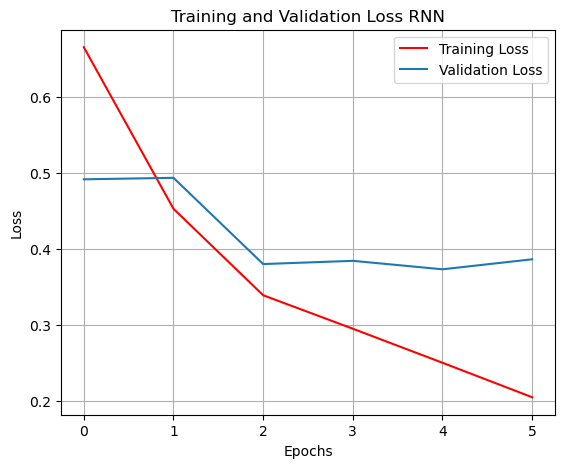

In [9]:
# Visualization of results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

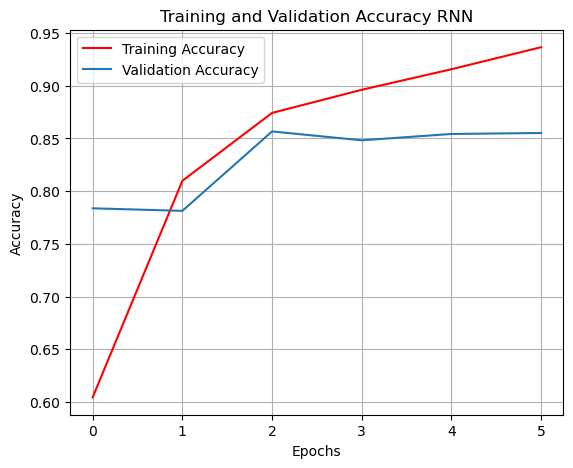

In [10]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy', color='red')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [11]:
# Prediction using the trained model
predictions = model_rnn.predict(x_test)

# To make the predictions more interpretable, they can be converted to binary format
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# For comparison, let's print some predicted values alongside the actual values
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}\n")

# Additional step — Model evaluation
# This will give the overall accuracy of the model on the test data
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_rnn))
print('Test Accuracy: {}'.format(test_acc_rnn))

782/782 [==============================] - 16s 20ms/step
Predicted: 0, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 0, Actual: 0

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

782/782 [==============================] - 16s 21ms/step - loss: 0.4022 - acc: 0.8503
Test Loss: 0.4021800756454468
Test Accuracy: 0.8502799868583679


### LSTM

In [12]:
# Building the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
Dropout(0.1)
model_lstm.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.05)))

In [13]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [14]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training the model
history = model_lstm.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 44s 301ms/step - loss: 0.6637 - acc: 0.7201 - val_loss: 0.5808 - val_acc: 0.7584
Epoch 2/6
137/137 [==============================] - 40s 289ms/step - loss: 0.4460 - acc: 0.8482 - val_loss: 0.4520 - val_acc: 0.8349
Epoch 3/6
137/137 [==============================] - 39s 287ms/step - loss: 0.3685 - acc: 0.8883 - val_loss: 0.3728 - val_acc: 0.8769
Epoch 4/6
137/137 [==============================] - 40s 291ms/step - loss: 0.3253 - acc: 0.9081 - val_loss: 0.3721 - val_acc: 0.8767
Epoch 5/6
137/137 [==============================] - 39s 288ms/step - loss: 0.2902 - acc: 0.9223 - val_loss: 0.3586 - val_acc: 0.8777
Epoch 6/6
137/137 [==============================] - 39s 288ms/step - loss: 0.2626 - acc: 0.9330 - val_loss: 0.3678 - val_acc: 0.8747


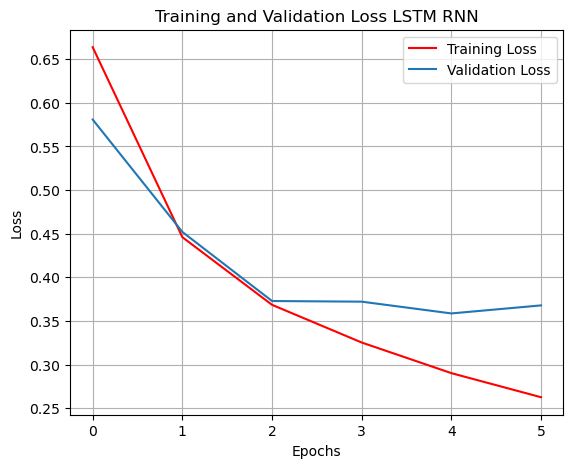

In [16]:
# Visualization of results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss LSTM RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

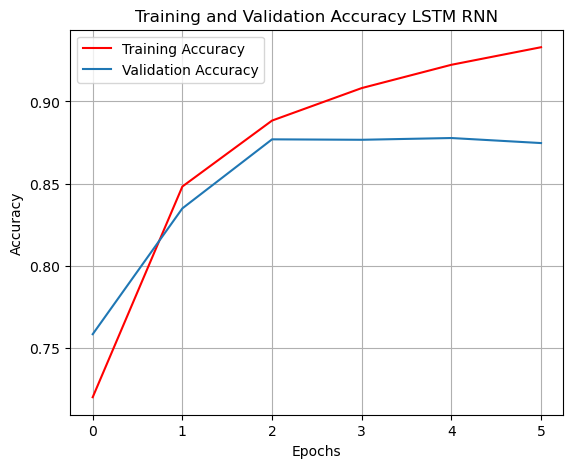

In [17]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy', color='red')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy LSTM RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [18]:
# Prediction using the trained model:
predictions = model_lstm.predict(x_test)

# To make the predictions more interpretable, they can be converted to binary format:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# For comparison, let's print some predicted values alongside the actual values
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}\n")

# Additional step: Model evaluation
# This will give the overall accuracy of the model on the test data
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_lstm))
print('Test Accuracy: {}'.format(test_acc_lstm))

782/782 [==============================] - 33s 42ms/step
Predicted: 0, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 0, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 0, Actual: 0

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

782/782 [==============================] - 33s 42ms/step - loss: 0.3947 - acc: 0.8614
Test Loss: 0.394695520401001
Test Accuracy: 0.8614400029182434


### GRU

In [19]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 32, input_length=maxlen))
model_gru.add(GRU(32))
Dropout(0.2)
model_gru.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [20]:
model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training the model
history = model_gru.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 41s 281ms/step - loss: 0.5841 - acc: 0.7115 - val_loss: 0.4156 - val_acc: 0.8333
Epoch 2/6
137/137 [==============================] - 38s 278ms/step - loss: 0.3535 - acc: 0.8612 - val_loss: 0.3503 - val_acc: 0.8615
Epoch 3/6
137/137 [==============================] - 38s 279ms/step - loss: 0.2887 - acc: 0.8962 - val_loss: 0.3451 - val_acc: 0.8637
Epoch 4/6
137/137 [==============================] - 38s 278ms/step - loss: 0.2489 - acc: 0.9138 - val_loss: 0.3663 - val_acc: 0.8569
Epoch 5/6
137/137 [==============================] - 38s 278ms/step - loss: 0.2254 - acc: 0.9235 - val_loss: 0.3382 - val_acc: 0.8695
Epoch 6/6
137/137 [==============================] - 38s 280ms/step - loss: 0.2053 - acc: 0.9347 - val_loss: 0.3547 - val_acc: 0.8744


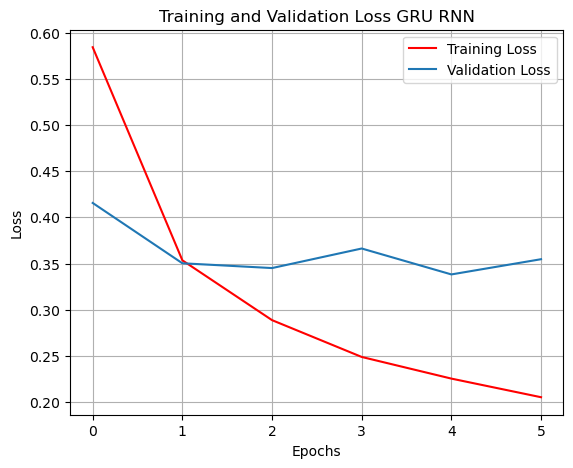

In [23]:
# Visualization of results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss GRU RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

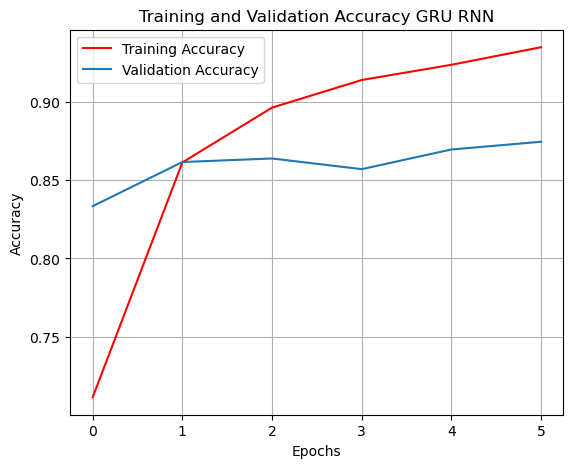

In [24]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy', color='red')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy GRU RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [25]:
# Prediction using the trained model:
predictions = model_gru.predict(x_test)

# To make the predictions more interpretable, they can be converted to binary format:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# For comparison, let's print some predicted values alongside the actual values
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}\n")

# Additional step: Model evaluation
# This will give the overall accuracy of the model on the test data
test_loss_gru, test_acc_gru = model_gru.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_gru))
print('Test Accuracy: {}'.format(test_acc_gru))

782/782 [==============================] - 27s 33ms/step
Predicted: 0, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 0, Actual: 0

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

782/782 [==============================] - 27s 34ms/step - loss: 0.3879 - acc: 0.8608
Test Loss: 0.38787758350372314
Test Accuracy: 0.8608400225639343


### Deep BRNN

In [26]:
# Building the model
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32, input_length=maxlen))
model_brnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_brnn.add(Bidirectional(LSTM(32)))
Dropout(0.1)
model_brnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))

In [27]:
model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
model_brnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 500, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Training the model
history = model_brnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 215s 2s/step - loss: 0.6471 - acc: 0.7346 - val_loss: 0.4705 - val_acc: 0.8427
Epoch 2/6
137/137 [==============================] - 199s 1s/step - loss: 0.3848 - acc: 0.8782 - val_loss: 0.4207 - val_acc: 0.8428
Epoch 3/6
137/137 [==============================] - 201s 1s/step - loss: 0.3093 - acc: 0.9080 - val_loss: 0.4224 - val_acc: 0.8404
Epoch 4/6
137/137 [==============================] - 203s 1s/step - loss: 0.2731 - acc: 0.9215 - val_loss: 0.3440 - val_acc: 0.8856
Epoch 5/6
137/137 [==============================] - 202s 1s/step - loss: 0.2383 - acc: 0.9365 - val_loss: 0.4491 - val_acc: 0.8411
Epoch 6/6
137/137 [==============================] - 203s 1s/step - loss: 0.2178 - acc: 0.9449 - val_loss: 0.3542 - val_acc: 0.8871


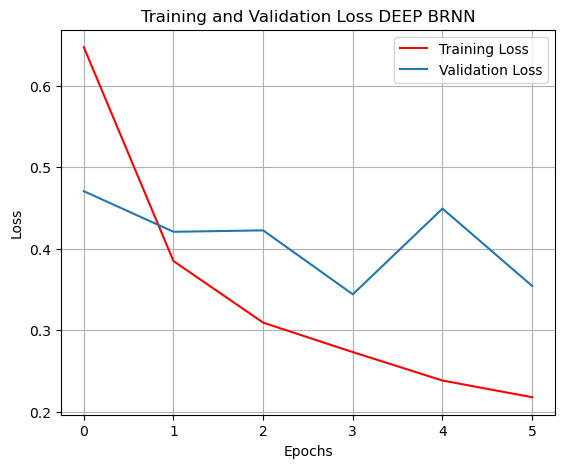

In [30]:
# Visualization of results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss DEEP BRNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()

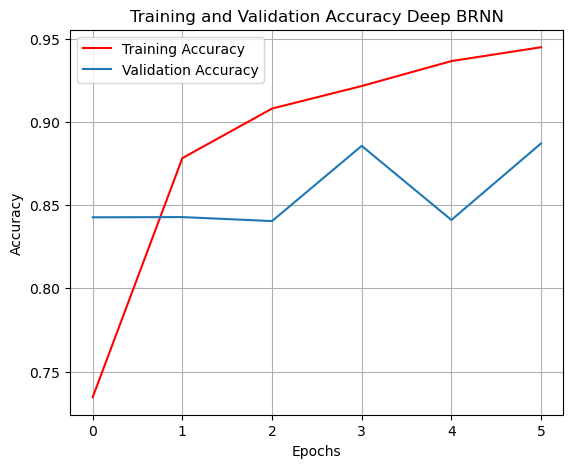

In [31]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy', color='red')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Deep BRNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [32]:
# Prediction using the trained model:
predictions = model_brnn.predict(x_test)

# To make the predictions more interpretable, they can be converted to binary format:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# For comparison, let's print some predicted values alongside the actual values
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}\n")

# Additional step: Model evaluation
# This will give the overall accuracy of the model on the test data
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_brnn))
print('Test Accuracy: {}'.format(test_acc_brnn))

782/782 [==============================] - 95s 120ms/step
Predicted: 0, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 1, Actual: 1

Predicted: 0, Actual: 0

Predicted: 1, Actual: 0

Predicted: 1, Actual: 1

782/782 [==============================] - 94s 121ms/step - loss: 0.3811 - acc: 0.8765
Test Loss: 0.3810701072216034
Test Accuracy: 0.876479983329773


### Comparison of accuracy and loss results:

In [33]:
results = {
    "SimpleRNN": {"test_loss": test_loss_rnn, "test_accuracy": test_acc_rnn},
    "LSTM  RNN": {"test_loss": test_loss_lstm, "test_accuracy": test_acc_lstm},
    "GRU   RNN": {"test_loss": test_loss_gru, "test_accuracy": test_acc_gru},
    "Bidir RNN": {"test_loss": test_loss_brnn, "test_accuracy": test_acc_brnn}
}

print("Model\t\t  Test Accuracy   Test Loss")
for model_name, metrics in results.items():
    print(f"{model_name}\t\t{metrics['test_accuracy']:.4f}\t\t{metrics['test_loss']:.4f}")


Model		  Test Accuracy   Test Loss
SimpleRNN		0.8503		0.4022
LSTM  RNN		0.8614		0.3947
GRU   RNN		0.8608		0.3879
Bidir RNN		0.8765		0.3811


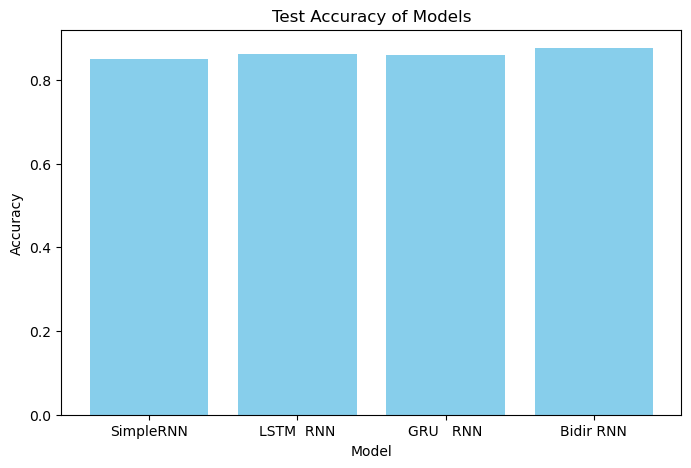

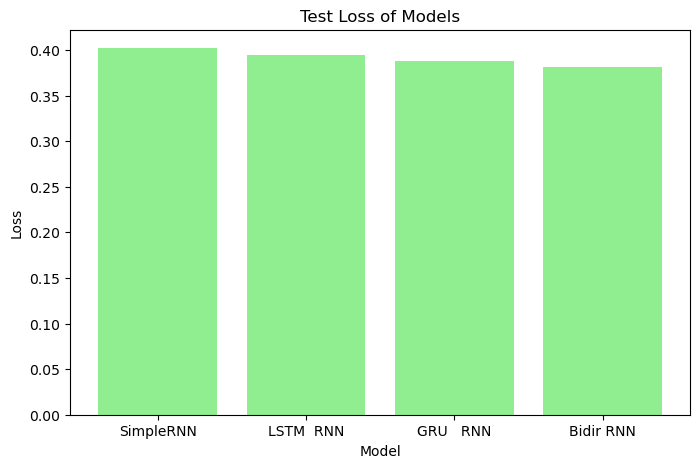

In [34]:
# Visualization of results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_accuracy'] for metrics in results.values()], color='skyblue')
plt.title('Test Accuracy of Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_loss'] for metrics in results.values()], color='lightgreen')
plt.title('Test Loss of Models')
plt.ylabel('Loss')
plt.xlabel('Model')
plt.show()

## Conclusions:
Four types of recurrent neural networks were built. For each of them, a minimal layer architecture was applied, adding L2 regularization and Dropout, as there was clear overfitting in each training. The number of epochs in each training was 6, with a batch size of 128.

Comparing these models, it can be said that the most accurate on the test dataset was the Deep Bidirectional RNN with an accuracy of 87%, while the least accurate was the Simple RNN, which achieved only 85% accuracy.

In terms of loss function comparison, the lowest loss was achieved by the Deep Bidirectional RNN with a loss of 0.38.
Therefore, it can be concluded that, overall, the Deep Bidirectional RNN performed the best.